In [1]:
import pathlib

import cv2
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from transforms import transforms

IMG_DIR = pathlib.Path("images/")

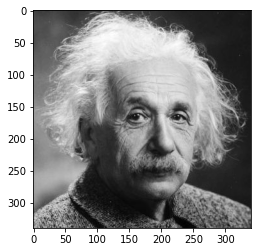

In [2]:
img = cv2.imread(str(IMG_DIR / "Albert_Einstein.jpg"), flags=cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap="gray")
plt.show()

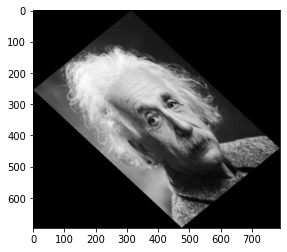

In [3]:
img_affine = cv2.imread(str(IMG_DIR / "Albert_Einstein_affine.jpg"), flags=cv2.IMREAD_GRAYSCALE)
plt.imshow(img_affine, cmap="gray")
plt.show()

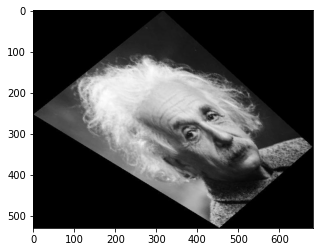

In [4]:
img_projective = cv2.imread(str(IMG_DIR / "Albert_Einstein_projective.jpg"), flags=cv2.IMREAD_GRAYSCALE)
plt.imshow(img_projective, cmap="gray")
plt.show()

### Affine Transformation Estimation with 3 Points

In [5]:
def get_points(img, n_points):
    %matplotlib tk
    fig = plt.figure(figsize=(10, 15))
    plt.imshow(img, cmap="gray")
    points = np.array(plt.ginput(n=n_points)).round(0)
    points = points[:, [1, 0]].transpose()
    plt.close()
    %matplotlib inline
    return points

In [6]:
p = get_points(img, 3)
p

array([[170., 172., 213.],
       [146., 237., 208.]])

In [7]:
p_dash = get_points(img_affine, 3)  # -> to homogenous
p_dash

array([[368., 295., 382.],
       [371., 453., 496.]])

In [8]:
p = np.vstack((p, np.ones((1, 3))))
p

array([[170., 172., 213.],
       [146., 237., 208.],
       [  1.,   1.,   1.]])

In [9]:
p_dash = np.vstack((p_dash, np.ones((1, 3))))
p_dash

array([[368., 295., 382.],
       [371., 453., 496.],
       [  1.,   1.,   1.]])

In [10]:
# P_dash = A @ P
# Where A is a some affine transformation. Therefore...

affine_transform = p_dash @ np.linalg.inv(p)
affine_transform.round(1)

array([[  1.5,  -0.8, 229.8],
       [  1.7,   0.9, -37.5],
       [ -0. ,  -0. ,   1. ]])

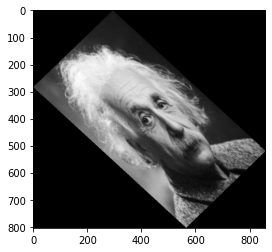

In [11]:
plt.imshow(transforms.apply_projective_transform(affine_transform, img), cmap="gray")
plt.show()

### Affine Transformation Estimation with More Than 3 Points

In [12]:
p = get_points(img, 5)
p

array([[168., 108., 171., 247., 246.],
       [146., 195., 246., 242., 148.]])

In [13]:
p_dash = get_points(img_affine, 5)
p_dash

array([[389., 254., 307., 405., 494.],
       [366., 356., 471., 581., 503.]])

In [14]:
p = np.vstack((p, np.ones((1, 5))))  # -> to homogenous
p

array([[168., 108., 171., 247., 246.],
       [146., 195., 246., 242., 148.],
       [  1.,   1.,   1.,   1.,   1.]])

In [15]:
p_dash = np.vstack((p_dash, np.ones((1, 5))))
p_dash

array([[389., 254., 307., 405., 494.],
       [366., 356., 471., 581., 503.],
       [  1.,   1.,   1.,   1.,   1.]])

In [16]:
# P_dash @ P.T = A @ P @ P.T
# Where A is a some affine transformation. Therefore...

affine_transform = p_dash @ p.T @ np.linalg.inv(p @ p.T)
affine_transform.round(1)

array([[  1.4,  -0.9, 285.8],
       [  1.4,   0.9,  13.5],
       [ -0. ,  -0. ,   1. ]])

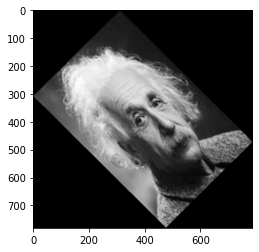

In [17]:
plt.imshow(transforms.apply_projective_transform(affine_transform, img), cmap="gray")
plt.show()

### Projective Transformation Estimation - DLT

In [22]:
def compute_right_null_space(A):
    w, v = np.linalg.eig(A.T @ A)
    return v[:, np.argmin(w)]

In [49]:
A = np.random.rand(3, 4)
v = compute_right_null_space(A)

In [77]:
p = get_points(img, 4)
p

array([[ -0.,   0., 339., 337.],
       [ -0., 340., 339.,  -0.]])

In [78]:
p_dash = get_points(img_projective, 4)
p_dash

array([[253.,   3., 332., 529.],
       [  0., 315., 678., 454.]])

In [79]:
p = np.vstack((p, np.ones((1, 4))))  # -> to homogenous
p_dash = np.vstack((p_dash, np.ones((1, 4))))

In [80]:
A = np.zeros((8, 9))
A[::2, :3] = -p.T
A

array([[   0.,    0.,   -1.,    0.,    0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.],
       [  -0., -340.,   -1.,    0.,    0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.],
       [-339., -339.,   -1.,    0.,    0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.],
       [-337.,    0.,   -1.,    0.,    0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.]])

In [81]:
A[1::2, 3:6] = -p.T
A

array([[   0.,    0.,   -1.,    0.,    0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.,   -1.,    0.,    0.,    0.],
       [  -0., -340.,   -1.,    0.,    0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,   -0., -340.,   -1.,    0.,    0.,    0.],
       [-339., -339.,   -1.,    0.,    0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0., -339., -339.,   -1.,    0.,    0.,    0.],
       [-337.,    0.,   -1.,    0.,    0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0., -337.,    0.,   -1.,    0.,    0.,    0.]])

In [82]:
p @ np.diag(p_dash[0, :])

array([[0.00000e+00, 0.00000e+00, 1.12548e+05, 1.78273e+05],
       [0.00000e+00, 1.02000e+03, 1.12548e+05, 0.00000e+00],
       [2.53000e+02, 3.00000e+00, 3.32000e+02, 5.29000e+02]])

In [83]:
A[::2, 6:] = (p @ np.diag(p_dash[0, :])).T
A[1::2, 6:] = (p @ np.diag(p_dash[1, :])).T
A.astype(np.int32)

array([[     0,      0,     -1,      0,      0,      0,      0,      0,
           253],
       [     0,      0,      0,      0,      0,     -1,      0,      0,
             0],
       [     0,   -340,     -1,      0,      0,      0,      0,   1020,
             3],
       [     0,      0,      0,      0,   -340,     -1,      0, 107100,
           315],
       [  -339,   -339,     -1,      0,      0,      0, 112548, 112548,
           332],
       [     0,      0,      0,   -339,   -339,     -1, 229842, 229842,
           678],
       [  -337,      0,     -1,      0,      0,      0, 178273,      0,
           529],
       [     0,      0,      0,   -337,      0,     -1, 152998,      0,
           454]])

In [84]:
h = compute_right_null_space(A)
h

array([-5.31382447e-03,  2.90445966e-03, -9.99941235e-01, -7.10695303e-03,
       -3.83711870e-03,  2.99107274e-11, -3.92607889e-06, -5.56808909e-07,
       -3.95233690e-03])

In [85]:
homography = h.reshape((3, 3))
homography

array([[-5.31382447e-03,  2.90445966e-03, -9.99941235e-01],
       [-7.10695303e-03, -3.83711870e-03,  2.99107274e-11],
       [-3.92607889e-06, -5.56808909e-07, -3.95233690e-03]])

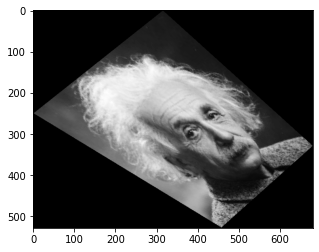

In [86]:
plt.imshow(transforms.apply_projective_transform(homography, img), cmap="gray")
plt.show()